<a href="https://colab.research.google.com/github/Yugsolanki/ML-SC-Lab/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading Dataset

In [2]:
!kaggle datasets download -d dileep070/heart-disease-prediction-using-logistic-regression

Dataset URL: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression
License(s): unknown
  0% 0.00/58.4k [00:00<?, ?B/s]
100% 58.4k/58.4k [00:00<00:00, 772kB/s]


In [3]:
!unzip /content/heart-disease-prediction-using-logistic-regression.zip

Archive:  /content/heart-disease-prediction-using-logistic-regression.zip
  inflating: framingham.csv          


In [4]:
data = pd.read_csv("/content/framingham.csv")

# Explore the data

In [5]:
print(data.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [6]:
print(data.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None


# Checking missing values and removing those rows

In [8]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [9]:
data = data.dropna()

In [10]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


# Analyze Correlation

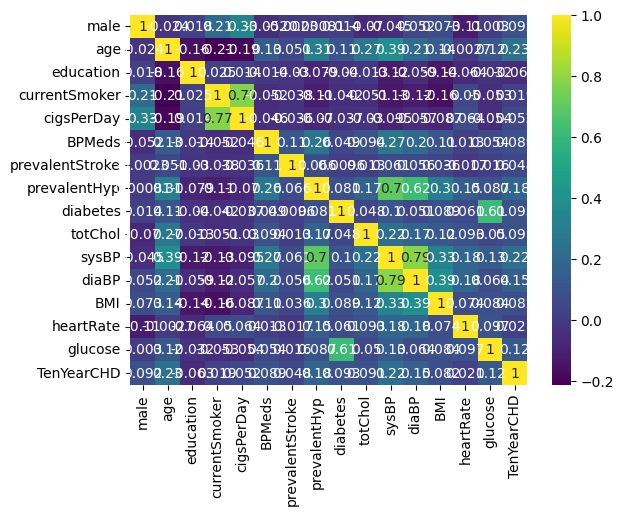

In [11]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.show()

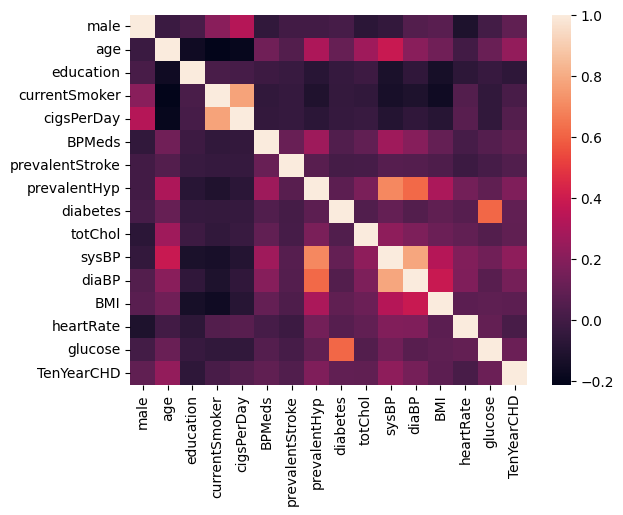

In [12]:
correlation_matrix2 = data.corr(method='pearson')
sns.heatmap(correlation_matrix)
plt.show()

# Visualize the data

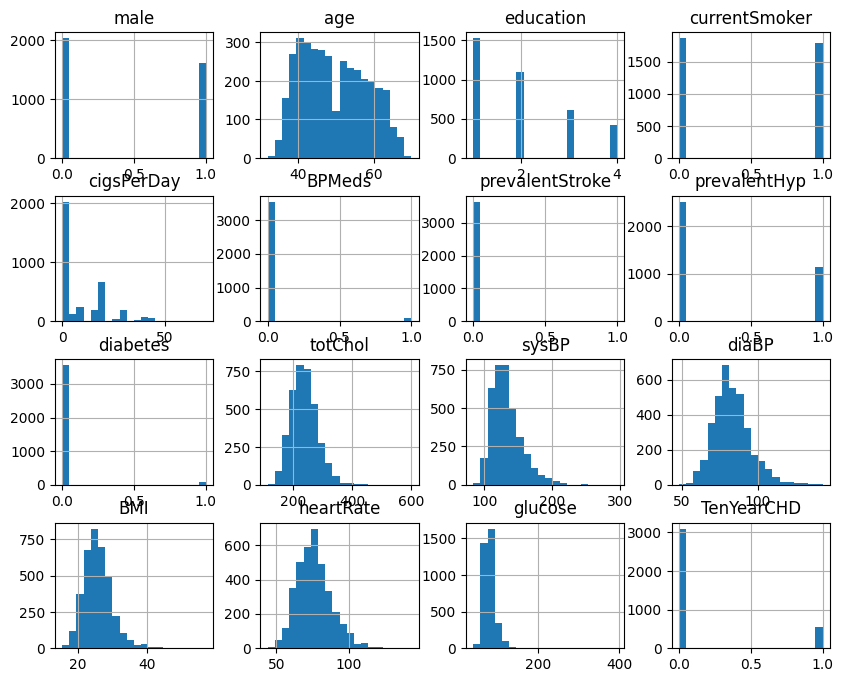

In [13]:
data.hist(bins=20, figsize=(10, 8))
plt.show()

# Data Preparation

In [14]:
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

# Split the data into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling and Normalization

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training and evaluation

In [17]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
model.intercept_

array([-2.05157151])

In [19]:
model.coef_

array([[ 0.31580666,  0.5842759 , -0.05558032,  0.10591364,  0.17698285,
         0.04128283,  0.06537363,  0.10836443,  0.06376706,  0.13284286,
         0.34165068, -0.07623281,  0.0163105 , -0.0722904 ,  0.13961994]])

# Make Prediction of testing set

In [20]:
y_pred = model.predict(X_test_scaled)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8360655737704918

Confusion Matrix:
 [[602   8]
 [112  10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.56      0.08      0.14       122

    accuracy                           0.84       732
   macro avg       0.70      0.53      0.53       732
weighted avg       0.80      0.84      0.78       732

